In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simple Exploratory Data Analysis (EDA)

### Digunakan untuk mengenal suatu dataset

In [3]:
df = pd.read_csv('iris.csv') # memuat file csv sebagai dataframe 

In [4]:
df.head() # tampilkan 5 baris pertama

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.drop(columns = 'Id', inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape # bentuk/dimensi dataset (baris,kolom)

(150, 5)

In [7]:
df.columns # daftar nama kolom

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
df.dtypes # tipe data untuk tiap kolom 

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
df.info() # informasi dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.isna().values.any() # mendeteksi keberadaan nilai kosong

False

In [11]:
#df[df.duplicated(keep = False)] # tampilkan seluruh baris dengan duplikasi
df[df.duplicated()] # tampilkan hanya baris duplikasi sekunder

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [12]:
df.drop_duplicates(inplace = True) # menghapus duplikasi data
df.shape

(147, 5)

In [13]:
df.describe() # deskripsi statistik data  

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
df.corr() # korelasi antar kolom 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


# Data Visualization 

### Heatmap

<AxesSubplot:>

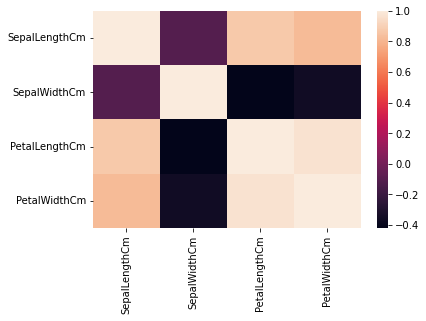

In [15]:
sns.heatmap(data = df.corr())

### Bar Plot

In [16]:
df['Species'].value_counts() # Menghitung jumlah setiap species

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

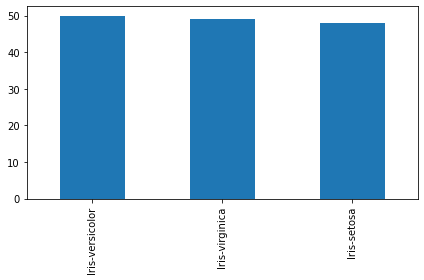

In [17]:
df['Species'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

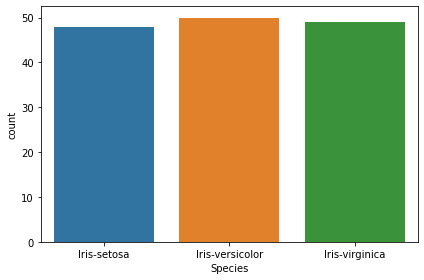

In [18]:
sns.countplot(data = df, x = 'Species')
plt.tight_layout()

### Pie Chart 

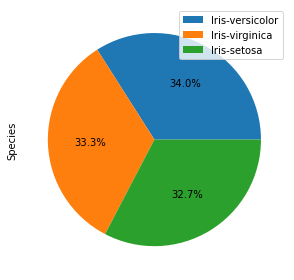

In [19]:
df["Species"].value_counts().plot.pie(autopct = '%1.1f%%', labels = None, legend = True)
plt.tight_layout()

### Line Plot

Text(0.5, 1.0, 'Petal Width')

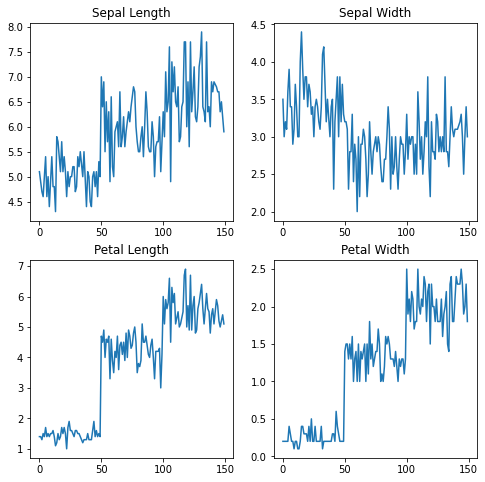

In [20]:
fig,ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))

df["SepalLengthCm"].plot.line(ax = ax [0][0])
ax[0][0].set_title("Sepal Length")

df["SepalWidthCm"].plot.line(ax = ax[0][1])
ax[0][1].set_title("Sepal Width")

df.PetalLengthCm.plot.line(ax = ax[1][0])
ax[1][0].set_title("Petal Length")

df.PetalWidthCm.plot.line(ax = ax[1][1])
ax[1][1].set_title("Petal Width")

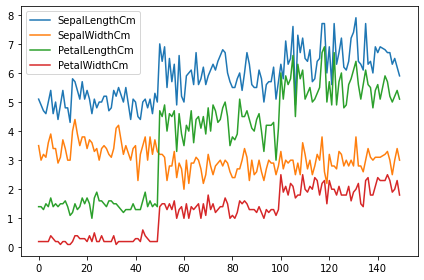

In [21]:
df.plot()
plt.tight_layout()

### Histogram

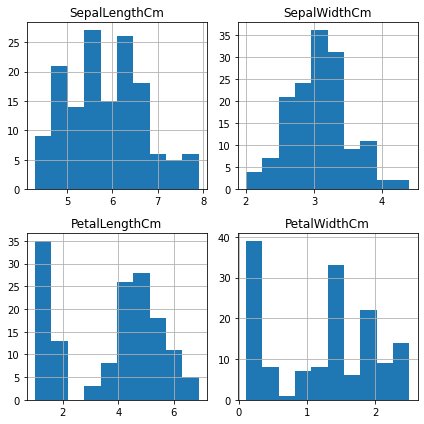

In [22]:
df.hist(figsize = (6,6), bins = 10)
plt.tight_layout()

### Boxplot

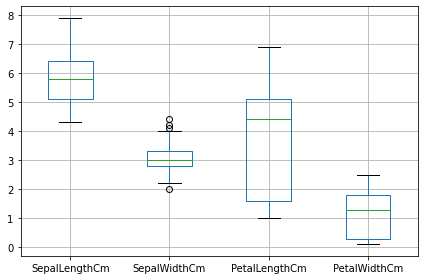

In [23]:
df.boxplot()
plt.tight_layout()

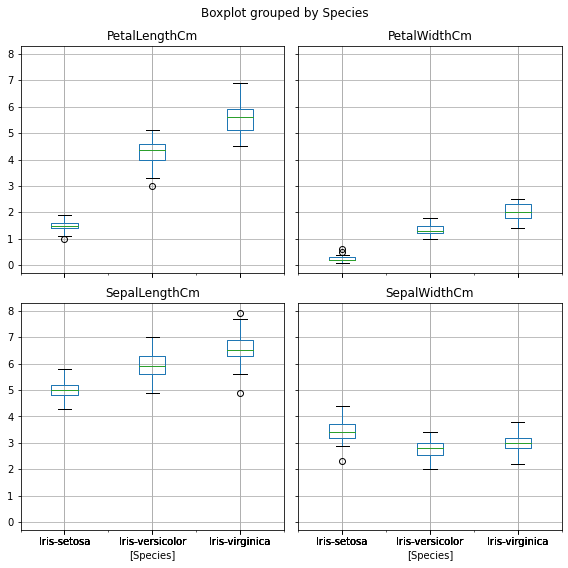

In [24]:
df.boxplot(by = "Species", figsize = (8,8))
plt.tight_layout()

### Scatter Plot

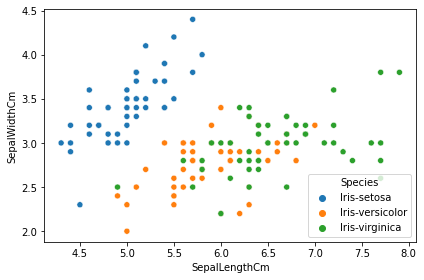

In [25]:
sns.scatterplot(x = "SepalLengthCm", y = "SepalWidthCm", data = df, hue = "Species")
plt.tight_layout()

### Pair Plot

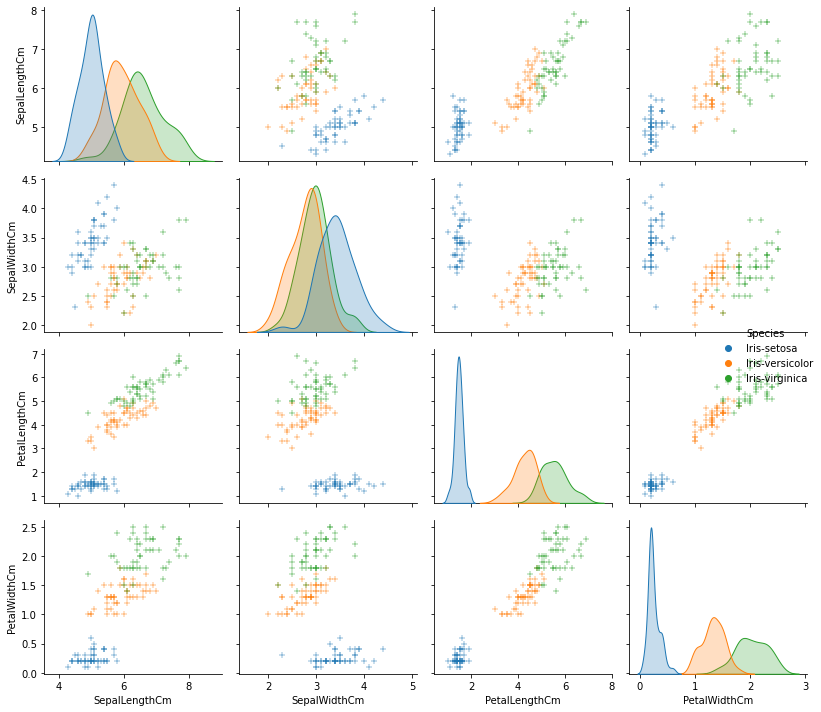

In [26]:
sns.pairplot(df, hue = "Species", markers = "+")
plt.tight_layout()

### violin Plot

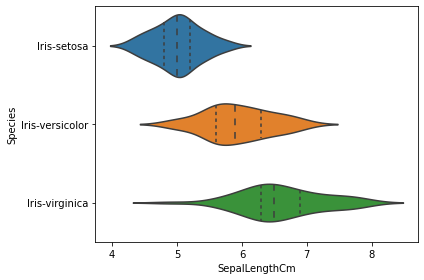

In [27]:
sns.violinplot(data = df, y = "Species", x = "SepalLengthCm", inner = "quartile")
plt.tight_layout()

# Classification Models 

### Import Modules 

In [28]:
from sklearn.model_selection import train_test_split # pembagi dataset menjadi training dan testing set
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # evaluas performa model

### Dataset: Features & Class Label

In [29]:
X = df.drop(columns = "Species") # Menempatkan features ke dalam variabel X
X.head() # tampilkan 5 baris pertama 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
y = df["Species"] # Menempatkan class label (target) ke dalam variabel y
y.head() # tampilkan 5 baris pertama

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [31]:
# membagi dataset ke dalam training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 10)

print("training dataset")
print(X_train.shape)
print(y_train.shape)
print()
print("testing dataset:")
print(X_test.shape)
print(y_test.shape)

training dataset
(88, 4)
(88,)

testing dataset:
(59, 4)
(59,)


### K Nearest Neighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
k_range = list(range(1,26))
scores = []
for k in k_range :
    model_knn = KNeighborsClassifier(n_neighbors = k) # konfigurasi algoritma
    model_knn.fit(X_train, y_train) # training model/classifier
    y_pred = model_knn.predict(X_test) # melakukan prediksi
    scores.append(accuracy_score(y_test, y_pred)) # evaluasi performa

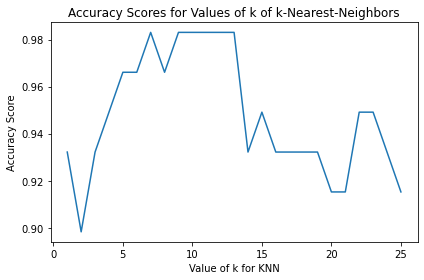

In [34]:
plt.plot(k_range, scores)
plt.xlabel("Value of k for KNN")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Values of k of k-Nearest-Neighbors")
plt.tight_layout()
plt.show()

In [35]:
model_knn = KNeighborsClassifier(n_neighbors = 3) # konfigurasi algoritma
model_knn.fit(X_train, y_train) # training model/classifier
y_pred = model_knn.predict(X_test) # melakukan prediksi

### Accuracy Score

In [36]:
print(accuracy_score(y_test, y_pred)) # evaluasi akurasi

0.9322033898305084


### Confusion Matrix

In [37]:
print(confusion_matrix(y_test, y_pred)) # evaluasi akurasi

[[18  0  0]
 [ 0 19  2]
 [ 0  2 18]]


### Classification Report

In [38]:
print(classification_report(y_test, y_pred)) # evaluasi klasifikasi

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.90      0.90      0.90        21
 Iris-virginica       0.90      0.90      0.90        20

       accuracy                           0.93        59
      macro avg       0.93      0.93      0.93        59
   weighted avg       0.93      0.93      0.93        59

